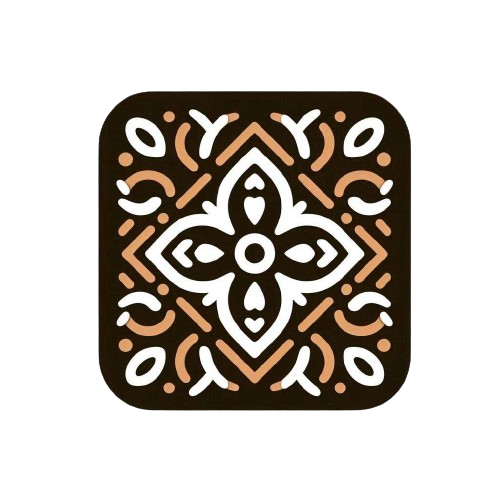

# **EXPERIMENTAL WORKBOOK: BATIK PATTERN CLASSIFICATION IMAGE**

# **DATASET: https://www.kaggle.com/datasets/hendryhb/batik-nusantara-batik-indonesia-dataset**

## **Which one dataset we used? raw_batik_v2.1**

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, walk_through_dir

--2024-05-29 18:13:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-29 18:13:37 (55.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# **Import Necessary Libraries**

In [ ]:
from google.colab import drive
import zipfile
import numpy as np
import os
from PIL import Image

# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# **Mount to Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Load Dataset**

In [ ]:
batikVal = "/content/gdrive/MyDrive/raw_batik_v2.1/test"
batikTrain = "/content/gdrive/MyDrive/raw_batik_v2.1/train"

# **Exploratory Data Analysis**

# Checking Format & Total Images In All Directory

In [ ]:
import imghdr

def count_images_and_formats(directory):
    formats = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file)[1].lower()
            if file_extension in formats:
                formats[file_extension] += 1
            else:
                formats[file_extension] = 1
    total_images = sum(formats.values())
    return total_images, formats

# Count the number of images and their formats
train_image_count, train_formats = count_images_and_formats(batikTrain)
val_image_count, val_formats = count_images_and_formats(batikVal)

# Display the total number of images and their formats
print("Total number of training images: ", train_image_count)
print("Training image formats: ", train_formats)
print("Total number of testing images: ", val_image_count)
print("Testing image formats: ", val_formats)

Total number of training images:  640
Training image formats:  {'.jpg': 640}
Total number of testing images:  160
Testing image formats:  {'.jpg': 160}


# **Distribution of Images in Training and Validation Sets**

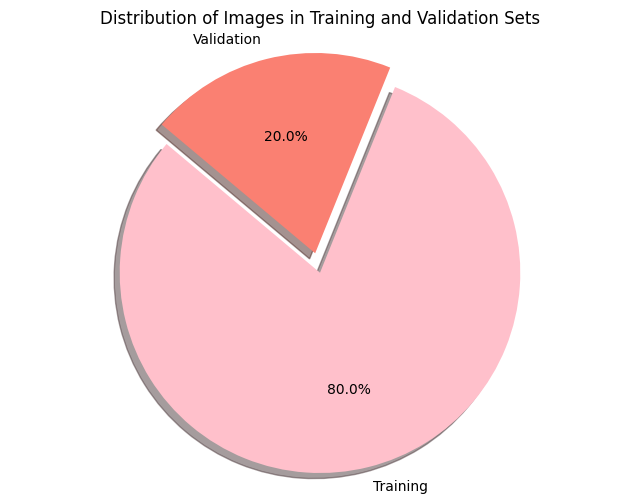

In [ ]:
import matplotlib.pyplot as plt

# Total number of images in training and validation sets
total_train_images = train_image_count
total_val_images = val_image_count

# Calculate percentages
train_percent = (total_train_images / (total_train_images + total_val_images)) * 100
val_percent = (total_val_images / (total_train_images + total_val_images)) * 100

# Plotting
labels = ['Training', 'Validation']
sizes = [train_percent, val_percent]
colors = ['pink', 'salmon']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Images in Training and Validation Sets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# **Total Number of Images in Validation Class**

In [ ]:
def count_images_in_each_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len([file for file in os.listdir(class_path) if file.endswith(('.jpg', '.jpeg', '.png'))])
    return class_counts

# Directory to be analyzed
directory = batikVal

# Count the number of images in each class
class_counts = count_images_in_each_class(directory)

# Display the number of images in each class
print('List Of All Class :')
for class_name, count in class_counts.items():
    print('===================')
    print(f"'{class_name}': {count}")

List Of All Class :
'Madura_Mataketeran': 8
'Kalimantan_Dayak': 8
'JawaTimur_Pring': 8
'Bali_Barong': 8
'Maluku_Pala': 8
'Aceh_Pintu_Aceh': 8
'Lampung_Gajah': 8
'DKI_Ondel_Ondel': 8
'JawaBarat_Megamendung': 8
'Bali_Merak': 8
'SulawesiSelatan_Lontara': 8
'SumateraBarat_Rumah_Minang': 8
'Papua_Cendrawasih': 8
'SumateraUtara_Boraspati': 8
'Papua_Tifa': 8
'Solo_Parang': 8
'Yogyakarta_Parang': 8
'NTB_Lumbung': 8
'Yogyakarta_Kawung': 8
'Papua_Asmat': 8


# **Total Images In Training Class**

In [ ]:
def count_images_in_each_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len([file for file in os.listdir(class_path) if file.endswith(('.jpg', '.jpeg', '.png'))])
    return class_counts

# Directory to be analyzed
directory = batikTrain

# Count the number of images in each class
class_counts = count_images_in_each_class(directory)

# Display the number of images in each class
print('List Of All Class :')
for class_name, count in class_counts.items():
    print('===================')
    print(f"'{class_name}': {count}")

List Of All Class :
'Madura_Mataketeran': 32
'Bali_Barong': 32
'DKI_Ondel_Ondel': 32
'JawaBarat_Megamendung': 32
'Bali_Merak': 32
'Aceh_Pintu_Aceh': 32
'Kalimantan_Dayak': 32
'Maluku_Pala': 32
'JawaTimur_Pring': 32
'Lampung_Gajah': 32
'SumateraUtara_Boraspati': 32
'Papua_Tifa': 32
'NTB_Lumbung': 32
'Yogyakarta_Parang': 32
'Solo_Parang': 32
'Papua_Cendrawasih': 32
'SumateraBarat_Rumah_Minang': 32
'Yogyakarta_Kawung': 32
'SulawesiSelatan_Lontara': 32
'Papua_Asmat': 32


# **Training The Model (Using MobileNetV2)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Define paths to training and validation directories
train_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/train'
val_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/test'

# Create data generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

# Load pre-trained MobileNetV2
pre_train_MobileNetV2 = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
pre_train_MobileNetV2.trainable = False

# Define the model
model_MNETV2 = Sequential([
    pre_train_MobileNetV2,
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model_MNETV2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks (ensure `checkpoint_callback` is defined)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True)

# Train the model
history_MNETV2 = model_MNETV2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=31,
    verbose=1,
    callbacks=[early_stopping, checkpoint_callback]
)


Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.
Epoch 1/31
20/20 [==============================] - 17s 665ms/step - loss: 3.8754 - accuracy: 0.0906 - val_loss: 2.7540 - val_accuracy: 0.1562
Epoch 2/31
20/20 [==============================] - 13s 644ms/step - loss: 2.8316 - accuracy: 0.2344 - val_loss: 2.3706 - val_accuracy: 0.3313
Epoch 3/31
20/20 [==============================] - 12s 627ms/step - loss: 2.3366 - accuracy: 0.3359 - val_loss: 2.0627 - val_accuracy: 0.4500
Epoch 4/31
20/20 [==============================] - 13s 637ms/step - loss: 2.0155 - accuracy: 0.4297 - val_loss: 1.8357 - val_accuracy: 0.5250
Epoch 5/31
20/20 [==============================] - 13s 633ms/step - loss: 1.7410 - accuracy: 0.4828 - val_loss: 1.6630 - val_accuracy: 0.5750
Epoch 6/31
20/20 [==============================] - 12s 593ms/step - loss: 1.4828 - accuracy: 0.5375 - val_loss: 1.5154 - val_accuracy: 0.6313
Epoch 7/31
20/20 [==============================] - 15s 74

# **History of Dataset Training (MobileNetV3)**

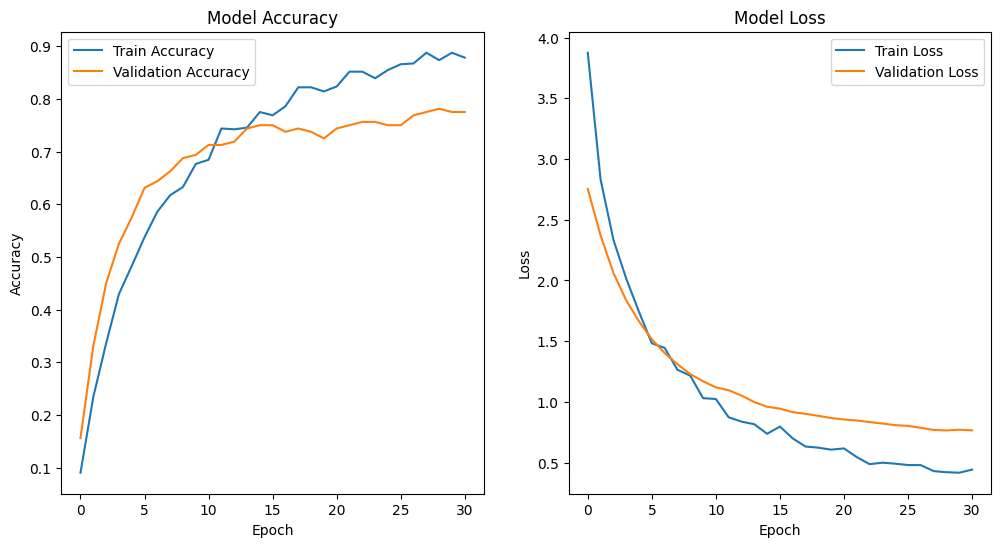

In [ ]:
def plot_metrics(history_MNETV2):

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_MNETV2.history['accuracy'], label='Train Accuracy')
    plt.plot(history_MNETV2.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_MNETV2.history['loss'], label='Train Loss')
    plt.plot(history_MNETV2.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.show()


plot_metrics(history_MNETV2)

# **Using InceptionV3**

In [ ]:
!pip install efficientnet-pytorch -qqq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.1 MB/s eta 0:00:00


# **Training The Model (Using InceptionV3)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3]
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define paths to training and validation directories
train_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/train'
val_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/test'

# Create data generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

# Load pre-trained InceptionV3
pre_train_InceptionV3 = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

# Unfreeze the top layers of the InceptionV3 model
for layer in pre_train_InceptionV3.layers[-20:]:
    layer.trainable = True

# Define the model with L2 regularization
model_InceptionV3 = tf.keras.Sequential([
    pre_train_InceptionV3,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax', kernel_regularizer=l2(0.01))
])

# Compile the model
model_InceptionV3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history_InceptionV3 = model_InceptionV3.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr, lr_scheduler]
)

# Evaluate the model on the test set
results = model_InceptionV3.evaluate(val_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

# Predict on the test set for classification report
y_pred_prob = model_InceptionV3.predict(val_gen)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = val_gen.classes

# Get the class names
class_names = list(val_gen.class_indices.keys())

# Print the classification report
print(classification_report(y_test, y_pred, target_names=class_names))


Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.
Epoch 1/50
20/20 [==============================] - 53s 1s/step - loss: 12.1932 - accuracy: 0.1266 - val_loss: 11.4511 - val_accuracy: 0.1250 - lr: 1.0000e-04
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 10.7875 - accuracy: 0.3375 - val_loss: 10.8002 - val_accuracy: 0.3375 - lr: 1.0000e-04
Epoch 3/50
20/20 [==============================] - 28s 1s/step - loss: 10.2084 - accuracy: 0.4812 - val_loss: 10.2937 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 4/50
20/20 [==============================] - 27s 1s/step - loss: 9.5833 - accuracy: 0.6469 - val_loss: 9.9817 - val_accuracy: 0.5750 - lr: 1.0000e-04
Epoch 5/50
20/20 [==============================] - 16s 782ms/step - loss: 9.2677 - accuracy: 0.7031 - val_loss: 9.6201 - val_accuracy: 0.6500 - lr: 1.0000e-04
Epoch 6/50
20/20 [==============================] - 27s 1s/step - loss: 8.9970 - accuracy: 0.7531 - val_loss: 9.3265 - val

# **Print The Accuracy**

In [ ]:
results = model_InceptionV3.evaluate(val_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 7.32063
Test Accuracy: 89.38%


# **Training History (Using InceptionV3)**

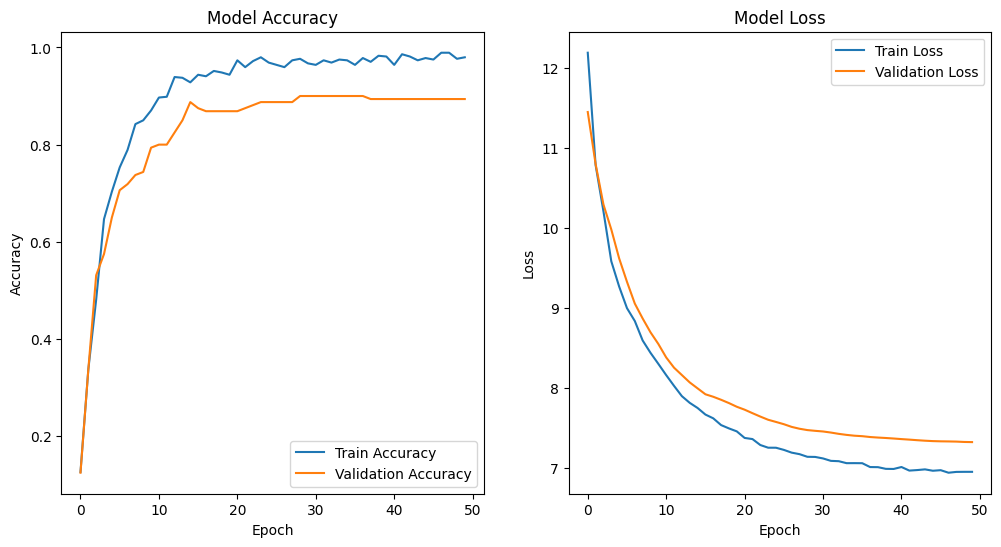

In [ ]:
def plot_metrics(history_InceptionV3):

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_InceptionV3.history['accuracy'], label='Train Accuracy')
    plt.plot(history_InceptionV3.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_InceptionV3.history['loss'], label='Train Loss')
    plt.plot(history_InceptionV3.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.show()


plot_metrics(history_InceptionV3)

# **Save The Model (InceptionV3)**

In [ ]:
model_InceptionV3.save('my_model_inceptionv3_regularization.h5')

# **Using ResNet-50 (gaada harapan)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define paths to training and validation directories
train_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/train'
val_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/test'

# Create data generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

# Load pre-trained ResNet50
pre_train_ResNet50 = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

# Unfreeze the top layers of the ResNet50 model
for layer in pre_train_ResNet50.layers[:-20]:
    layer.trainable = False

# Define the model
model_ResNet50 = tf.keras.Sequential([
    pre_train_ResNet50,
    BatchNormalization(),
    Dense(1024, activation='relu'),  # Increase the number of neurons
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),   # Additional layer
    Dropout(0.2),
    Dense(20, activation='softmax')
])

# Compile the model
model_ResNet50.compile(
    optimizer=Adam(learning_rate=0.0001),  # Try a smaller learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint(filepath='model_resnet50_checkpoint.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history_ResNet50 = model_ResNet50.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,  # Increase the number of epochs
    batch_size=128,  # Adjust batch size
    verbose=1,
    callbacks=[early_stopping, checkpoint_callback, reduce_lr]
)

Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.
Epoch 1/100
20/20 [==============================] - 22s 718ms/step - loss: 3.4846 - accuracy: 0.0641 - val_loss: 3.0264 - val_accuracy: 0.0625 - lr: 1.0000e-04
Epoch 2/100
20/20 [==============================] - 14s 693ms/step - loss: 3.1231 - accuracy: 0.1016 - val_loss: 2.9854 - val_accuracy: 0.0750 - lr: 1.0000e-04
Epoch 3/100
20/20 [==============================] - 14s 687ms/step - loss: 2.9872 - accuracy: 0.1250 - val_loss: 2.9667 - val_accuracy: 0.0750 - lr: 1.0000e-04
Epoch 4/100
20/20 [==============================] - 14s 692ms/step - loss: 2.8980 - accuracy: 0.1437 - val_loss: 2.9571 - val_accuracy: 0.0688 - lr: 1.0000e-04
Epoch 5/100
20/20 [==============================] - 14s 703ms/step - loss: 2.7774 - accuracy: 0.1688 - val_loss: 2.9429 - val_accuracy: 0.0625 - lr: 1.0000e-04
Epoch 6/100
20/20 [==============================] - 14s 707ms/step - loss: 2.7851 - accuracy: 0.1797 - val_los

# **Print The Accuracy**

In [ ]:
results = model_ResNet50.evaluate(val_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 1.71009
Test Accuracy: 48.75%


# **Training History (Using ResNet-50)**

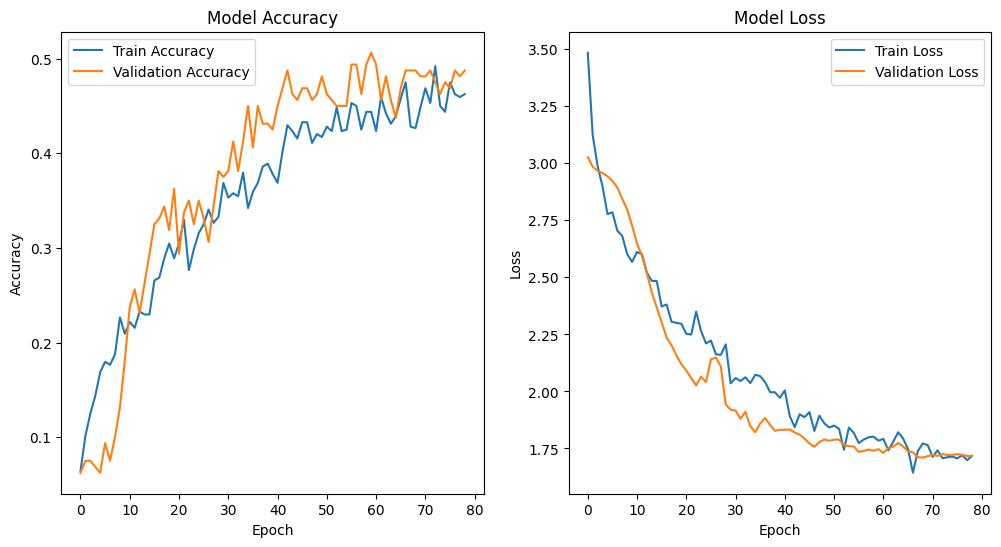

In [ ]:
def plot_metrics(history_ResNet50):

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_ResNet50.history['accuracy'], label='Train Accuracy')
    plt.plot(history_ResNet50.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_ResNet50.history['loss'], label='Train Loss')
    plt.plot(history_ResNet50.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.show()


plot_metrics(history_ResNet50)

# **Save The Model (Using ResNet-50)**

In [ ]:
model_ResNet50.save('my_model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Using NASNetMobile**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Define paths to training and validation directories
train_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/train'
val_dir = '/content/gdrive/MyDrive/raw_batik_v2.1/test'

# Create data generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjusted for NASNetMobile input size
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Adjusted for NASNetMobile input size
    batch_size=32,
    shuffle=True,
    color_mode='rgb',
    class_mode='categorical'
)

# Load pre-trained NASNetMobile
pre_train_NASNetMobile = NASNetMobile(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",
    pooling='avg'
)
pre_train_NASNetMobile.trainable = False

# Define the model
model_NASNetMobile = Sequential([
    pre_train_NASNetMobile,
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),  # Additional dense layer
    BatchNormalization(),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model
model_NASNetMobile.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks (ensure `checkpoint_callback` is defined)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True)

# Train the model
history_NASNetMobile = model_NASNetMobile.fit(
    train_gen,
    validation_data=val_gen,
    epochs=70,
    verbose=1,
    callbacks=[early_stopping, checkpoint_callback]
)


Found 640 images belonging to 20 classes.
Found 160 images belonging to 20 classes.
19993432/19993432 [==============================] - 0s 0us/step
Epoch 1/70
20/20 [==============================] - ETA: 0s - loss: 4.1276 - accuracy: 0.0437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 253s 12s/step - loss: 4.1276 - accuracy: 0.0437 - val_loss: 3.0301 - val_accuracy: 0.0562
Epoch 2/70
20/20 [==============================] - 83s 4s/step - loss: 3.5477 - accuracy: 0.0906 - val_loss: 2.9093 - val_accuracy: 0.1063
Epoch 3/70
20/20 [==============================] - 86s 4s/step - loss: 3.1668 - accuracy: 0.1547 - val_loss: 2.7870 - val_accuracy: 0.2000
Epoch 4/70
20/20 [==============================] - 83s 4s/step - loss: 2.9975 - accuracy: 0.1859 - val_loss: 2.6689 - val_accuracy: 0.2688
Epoch 5/70
20/20 [==============================] - 90s 4s/step - loss: 2.7202 - accuracy: 0.2438 - val_loss: 2.5597 - val_accuracy: 0.2937
Epoch 6/70
20/20 [==============================] - 83s 4s/step - loss: 2.6017 - accuracy: 0.2656 - val_loss: 2.4545 - val_accuracy: 0.3313
Epoch 7/70
14/20 [====================>.........] - ETA: 20s - loss: 2.4260 - accuracy: 0.3058

# **Print The Accuracy**

In [ ]:
results = model_NASNetMobile.evaluate(val_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

# **Training History (Using NASNetMobile)**

In [ ]:
def plot_metrics(history_NASNetMobile):

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history_NASNetMobile.history['accuracy'], label='Train Accuracy')
    plt.plot(history_NASNetMobile.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_NASNetMobile.history['loss'], label='Train Loss')
    plt.plot(history_NASNetMobile.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    plt.show()


plot_metrics(history_NASNetMobile)

# **Save The Model (Using NASNetMobile)**

In [ ]:
model_NASNetMobile.save('my_model_nasnetmobile.h5')